In [3]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')
    %cd /content/drive/MyDrive/polar-lows-detection-forecasting-deep-learning/
    !pip install pytorch-lightning
    !pip install captum
    !pip install timm
    !pip install torchinfo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/polar-lows-detection-forecasting-deep-learning


In [4]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from tqdm import tqdm

from config import (
    train_dir,
    test_dir,
    num_workers,
    resized_image_res,
    verbose,
    device
)
from data_loader import create_data_loaders
from models import XceptionModel
from model_container import ModelContainer

import warnings
warnings.filterwarnings('ignore', message='.*DataLoader will create.*') # Suppressed the warning related to the creation of DataLoader using a high number of num_workers

In [5]:
# Create data loaders

batch_size = 32
train_loader, val_loader, _ = create_data_loaders(train_dir, test_dir, resized_image_res, batch_size, num_workers, verbose=verbose)

In [6]:
model = XceptionModel(num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

lit_model = ModelContainer(model, criterion, optimizer)


# Callbacks

early_stopping_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5
)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    dirpath='checkpoints/',
    filename='best-checkpoint'
)

/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:117: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [7]:
# Train model

trainer = pl.Trainer(
    max_epochs = 100,
    callbacks=[early_stopping_callback, checkpoint_callback],
    accelerator='gpu' if torch.cuda.is_available() else 'cpu',
    devices=1,
    check_val_every_n_epoch=1,
    # precision=16 if torch.cuda.is_available() else 32 # Enables mixed precision
)

trainer.fit(lit_model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/drive/MyDrive/polar-lows-detection-forecasting-deep-learning/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | XceptionModel    | 20.9 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
20.9 M    Trainable params
0         Non-trainable params
20.9 M    Total params
83.491    Total estimated model params size (MB)
225       M

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Epoch 0 - Validation:
Loss: 0.6586, Precision: 0.0000, Recall: 0.0000, F1: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (39) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0 - Validation:
Loss: 0.4196, Precision: 0.4732, Recall: 1.0000, F1: 0.6424
Epoch 0 - Training:
Loss: 0.3233, Precision: 0.8898, Recall: 0.8689, F1: 0.8793


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1 - Validation:
Loss: 0.2030, Precision: 0.7846, Recall: 0.9623, F1: 0.8644
Epoch 1 - Training:
Loss: 0.1688, Precision: 0.9572, Recall: 0.9510, F1: 0.9541


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2 - Validation:
Loss: 0.1029, Precision: 0.9556, Recall: 0.8113, F1: 0.8776
Epoch 2 - Training:
Loss: 0.1637, Precision: 0.9462, Recall: 0.9462, F1: 0.9462


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3 - Validation:
Loss: 0.1075, Precision: 0.8030, Recall: 1.0000, F1: 0.8908
Epoch 3 - Training:
Loss: 0.1394, Precision: 0.9565, Recall: 0.9639, F1: 0.9602


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4 - Validation:
Loss: 0.0792, Precision: 0.9245, Recall: 0.9245, F1: 0.9245
Epoch 4 - Training:
Loss: 0.1497, Precision: 0.9485, Recall: 0.9379, F1: 0.9432


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5 - Validation:
Loss: 0.0950, Precision: 0.8361, Recall: 0.9623, F1: 0.8947
Epoch 5 - Training:
Loss: 0.1292, Precision: 0.9401, Recall: 0.9628, F1: 0.9513


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6 - Validation:
Loss: 0.1515, Precision: 0.7647, Recall: 0.9811, F1: 0.8595
Epoch 6 - Training:
Loss: 0.1344, Precision: 0.9512, Recall: 0.9606, F1: 0.9559


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7 - Validation:
Loss: 0.0780, Precision: 0.9556, Recall: 0.8113, F1: 0.8776
Epoch 7 - Training:
Loss: 0.1140, Precision: 0.9660, Recall: 0.9567, F1: 0.9613


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8 - Validation:
Loss: 0.0957, Precision: 0.9091, Recall: 0.9434, F1: 0.9259
Epoch 8 - Training:
Loss: 0.0695, Precision: 0.9824, Recall: 0.9731, F1: 0.9777


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9 - Validation:
Loss: 0.0669, Precision: 0.9273, Recall: 0.9623, F1: 0.9444
Epoch 9 - Training:
Loss: 0.0786, Precision: 0.9811, Recall: 0.9781, F1: 0.9796


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10 - Validation:
Loss: 0.0637, Precision: 0.8966, Recall: 0.9811, F1: 0.9369
Epoch 10 - Training:
Loss: 0.0760, Precision: 0.9773, Recall: 0.9710, F1: 0.9742


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11 - Validation:
Loss: 0.0838, Precision: 0.9556, Recall: 0.8113, F1: 0.8776
Epoch 11 - Training:
Loss: 0.1022, Precision: 0.9741, Recall: 0.9632, F1: 0.9686


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12 - Validation:
Loss: 0.0863, Precision: 0.8667, Recall: 0.9811, F1: 0.9204
Epoch 12 - Training:
Loss: 0.0694, Precision: 0.9705, Recall: 0.9818, F1: 0.9761


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13 - Validation:
Loss: 0.0742, Precision: 0.9038, Recall: 0.8868, F1: 0.8952
Epoch 13 - Training:
Loss: 0.0564, Precision: 0.9873, Recall: 0.9811, F1: 0.9842


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14 - Validation:
Loss: 0.0820, Precision: 0.9273, Recall: 0.9623, F1: 0.9444
Epoch 14 - Training:
Loss: 0.0677, Precision: 0.9773, Recall: 0.9837, F1: 0.9805


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15 - Validation:
Loss: 0.0643, Precision: 0.9138, Recall: 1.0000, F1: 0.9550
Epoch 15 - Training:
Loss: 0.0517, Precision: 0.9887, Recall: 0.9824, F1: 0.9856


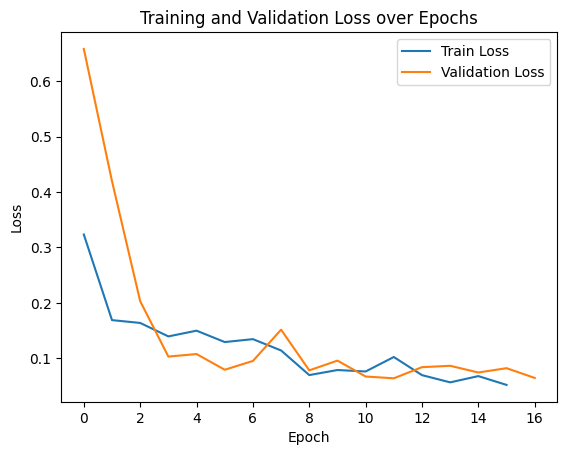

In [8]:
# Plot training and validation loss over epochs
plt.plot(lit_model.train_losses, label='Train Loss')
plt.plot(lit_model.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()